## Template Matching Citra Mata Uang Indonesia

In [37]:
import matplotlib.pyplot as plt #importing matplotlib
import numpy as np
import cv2 as cv
import mysql.connector

In [139]:
#Inisialisasi Koneksi Database ke MySQL
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="pcd"
)
cursor = db.cursor()
cursor.execute("SELECT * FROM template")
template = cursor.fetchall()


print(mydb, cursor, type(template), template[0][5])

# for mag in riwayat_magang

<mysql.connector.connection_cext.CMySQLConnection object at 0x0000029AFF575C10> CMySQLCursor: SELECT * FROM template <class 'list'> Seratus Ribu Rupiah Edisi Keluaran 2020


In [147]:
def mean_rgb(img):
    newImg = np.ndarray.copy(img)
    total_pixel = 0
    total_red = 0
    total_green = 0
    total_blue = 0
    # Iterasi
    for i in range(len(newImg)):
        row = newImg[i]
        for j in range(len(row)):
            current_pixel = row[j]
            total_pixel += 1 #Tambah jumlah pixel
            total_red += current_pixel[0] #Tambah total red
            total_green += current_pixel[1] #Tambah total green
            total_blue += current_pixel[2] #Tambah total blue
            
    mean_red = total_red / total_pixel
    mean_green = total_green / total_pixel
    mean_blue = total_blue / total_pixel
#     print(total_red, total_green, total_blue, total_pixel)
    return np.array([round(mean_red, 2), round(mean_green, 2), round(mean_blue, 2)]) #Return nilai mean dari masing-masing komponen RGB, bulatkan ke 2 desimal terdekat
    

40.54000000000002 Seratus Ribu Rupiah Edisi Keluaran 2020
57.97 Seribu Rupiah Edisi Keluaran 2005
70.96000000000001 Lima ribu Rupiah Edisi Keluaran 2009
45.26000000000002 Lima ribu Rupiah Edisi Keluaran 2020
60.78 Sepuluh ribu Rupiah Edisi Keluaran 2009
58.05000000000001 Sepuluh ribu Rupiah Edisi Keluaran 2020
55.23000000000002 Seratus Ribu Rupiah Edisi Keluaran 2009
Matching berhasil, gambar paling mirip adalah  Seratus Ribu Rupiah Edisi Keluaran 2020


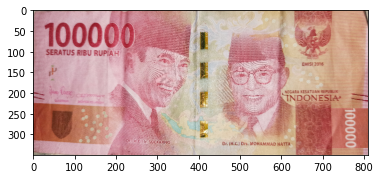

In [188]:
uang_uji = cv.imread("img/100k-uji-enhanced3.jpg")
uang_uji = cv.cvtColor(uang_uji, cv.COLOR_BGR2RGB)

#Resize gambar agar ukuran sesuai dengan ukuran template matching
original_width = uang_uji.shape[1]
original_height = uang_uji.shape[0]
new_width = 810
skala_resize = new_width / original_width
new_height = int(skala_resize * original_height) #Dapatkan height berdasarkan skala resize width, agar tetap maintain aspect ratio

dim = (new_width, new_height)
# print(dim)
resized_uji = cv.resize(uang_uji, dim)
cropped_uji = resized_uji[0:150, 0:300]
plt.imshow(resized_uji)

mean_img = mean_rgb(cropped_uji)
mean_red = mean_img[0]
mean_green = mean_img[1]
mean_blue = mean_img[2]

toleransi_error = '40'
#Template Matching
statement = """SELECT r,g,b,uang,terbilang
            FROM template
            WHERE (
                    """+str(mean_red)+""" BETWEEN r -"""+toleransi_error+""" AND r + """+toleransi_error+"""
                )
                AND (
                    """+str(mean_green)+""" BETWEEN g -"""+toleransi_error+""" AND g + """+toleransi_error+"""
                )
                AND (
                    """+str(mean_blue)+""" BETWEEN b -"""+toleransi_error+""" AND b + """+toleransi_error+"""
                )"""
# print(statement)
cursor = db.cursor()
cursor.execute(statement)
res = cursor.fetchall()
# print(res, "\n")

if (len(res)>0):
    if (len(res) == 1):
        #Cuma ada 1 hasil, langsung printkan
        print("Matching berhasil, gambar adalah ", res[0][4])
    else:
        #Lakukan iterasi, cari hasil matching dengan selisih paling sedikit
        nearest_match_index = 0
        total_selisih = abs(float(res[0][0]) - mean_red) + abs(float(res[0][1]) - mean_green) + abs(float(res[0][2]) - mean_blue)
        for i in range(len(res)):
            cur_r = float(res[i][0])
            cur_g = float(res[i][1])
            cur_b = float(res[i][2])
            cur_total_selisih = abs(cur_r - mean_red) + abs(cur_g - mean_green) + abs(cur_b - mean_blue)
            print(cur_total_selisih, res[i][4])
            if (cur_total_selisih < total_selisih):
                nearest_match_index = i
            
        print("Matching berhasil, gambar paling mirip adalah ", res[nearest_match_index][4])
else:
    print("Maaf, data tidak ditemukan")
